# 라라라

In [17]:
!wget http://www.timeseriesclassification.com/Downloads/FordA.zip

--2022-06-04 23:09:01--  http://www.timeseriesclassification.com/Downloads/FordA.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36365254 (35M) [application/zip]
Saving to: 'FordA.zip'

     0K .......... .......... .......... .......... ..........  0% 88.4K 6m41s
    50K .......... .......... .......... .......... ..........  0%  178K 5m0s
   100K .......... .......... .......... .......... ..........  0% 11.7M 3m21s
   150K .......... .......... .......... .......... ..........  0% 11.3M 2m31s
   200K .......... .......... .......... .......... ..........  0%  180K 2m40s
   250K .......... .......... .......... .......... ..........  0% 11.4M 2m13s
   300K .......... .......... .......... .......... ..........  0% 11.3M 1m55s
   350K .......... .......... ..........

In [21]:
!unzip FordA.zip

Archive:  FordA.zip
  inflating: FordA.txt               
  inflating: FordA_TEST.arff         
  inflating: FordA_TEST.txt          
  inflating: FordA_TRAIN.arff        
  inflating: FordA_TRAIN.txt         
  inflating: FordA_TEST.ts           
  inflating: FordA_TRAIN.ts          


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

In [30]:
seq_data = []
for i in np.arange(0,1000):
    seq_data += [[np.sin( np.pi * i * 0.01)]]
X, y = make_sample(seq_data, 10)

In [31]:
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(10,1)))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

Epoch 1/100
31/31 [==============================] - 3s 10ms/step - loss: 0.4176
Epoch 2/100
31/31 [==============================] - 0s 10ms/step - loss: 0.1020
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0621
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0492
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 0.0394
Epoch 6/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0317
Epoch 7/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0255
Epoch 8/100
31/31 [==============================] - ETA: 0s - loss: 0.020 - 0s 10ms/step - loss: 0.0208
Epoch 9/100
31/31 [==============================] - 0s 13ms/step - loss: 0.0172
Epoch 10/100
31/31 [==============================] - 0s 14ms/step - loss: 0.0151
Epoch 11/100
31/31 [==============================] - 0s 12ms/step - loss: 0.0139
Epoch 12/100
31/31 [==============================] - 0s 11ms/step - loss: 0.0130
Ep

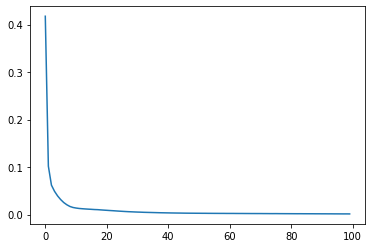

In [33]:
history = model.fit(X, y, epochs=100, verbose=1)
plt.plot(history.history['loss'], label='loss')
plt.show()

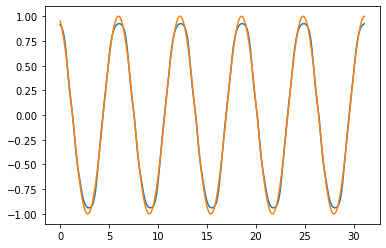

In [39]:
seq_data = []
for i in np.arange(0, 1000):
    seq_data += [[np.cos(np.pi*i*0.01)]]

X, y = make_sample(seq_data, 10)

y_pred = model.predict(X, verbose=0)
plt.plot(np.pi*np.arange(0, 990)*0.01, y_pred)
plt.plot(np.pi*np.arange(0, 990)*0.01, y)
plt.show()

# 11장 연습문제

## 9번 문제

In [80]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    print(data.shape)
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

(3601, 501)
(1320, 501)


In [71]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3601, 500)
(3601,)
(1320, 500)
(1320,)


In [75]:
print(y_train[5])

1


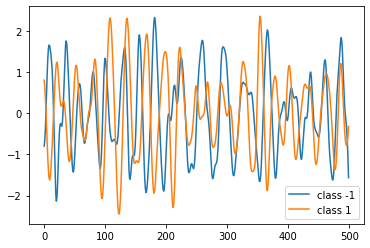

In [87]:
classes = np.unique(y_train, axis=0)

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [91]:
# 데이터 전처리
## 데이터 표준화


# 우리의 타임시리즈는 이미 하나의 길이이지만, 그들의 값들은 다양한 길이를 가지고 있다.
# 이것은 뉴럴 네트워크에 적합하지 않다. 보통 우리는 입력값을 표준화할 필요가 있다.
# 이러한 데이터셋은 특히, z-normalized된 것인데, 각각의 타임시리즈 샘플들은
# 평균이 0이고 표준편차는 1이다.
# 이러한 타입의 표준화는 타임시리즈 분류에 매우 보현화되어 있다.

# 여기에 사용된 시계열 데이터는 단변량이다.
# 즉, 시계열 예제당 하나의 채널만 있음을 의미한다는 것이다.
# 우리는 그러므로 numpy를 통해 간단한 reshaping을 사용하여
# 하나의 채널이 있는 다변수 시계열로 변환시킬 것이다.
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3601, 500, 1)
(3601,)
(1320, 500, 1)
(1320,)


In [92]:
# spase_categorical_crossentropy를 사용하기 위해 class의 갯수를 저장한다.
num_classes = len(np.unique(y_train))

In [93]:
# np.random.permutation은 무작위로 섞인 배열을 만든다.
idx = np.random.permutation(len(x_train))

# 넘파이의 인덱스 연산을 사용한다.
x_train = x_train[idx]
y_train = y_train[idx]

In [94]:
# 라벨들을 양의 정수로 바꿔준다.
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [96]:
print(y_train)

[1 1 1 ... 1 0 0]


In [3]:
# 모델 설계
from tensorflow import keras

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [99]:
model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [102]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    
    ics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 2s 10ms/step - loss: 0.1286 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.7753 - val_sparse_categorical_accuracy: 0.7268 - lr: 0.0010
Epoch 2/500
90/90 [==============================] - 1s 7ms/step - loss: 0.1257 - sparse_categorical_accuracy: 0.9569 - val_loss: 0.5446 - val_sparse_categorical_accuracy: 0.7836 - lr: 0.0010
Epoch 3/500
90/90 [==============================] - 1s 7ms/step - loss: 0.1323 - sparse_categorical_accuracy: 0.9549 - val_loss: 0.2975 - val_sparse_categorical_accuracy: 0.8488 - lr: 0.0010
Epoch 4/500
90/90 [==============================] - 1s 7ms/step - loss: 0.1410 - sparse_categorical_accuracy: 0.9507 - val_loss: 0.2594 - val_sparse_categorical_accuracy: 0.8724 - lr: 0.0010
Epoch 5/500
90/90 [==============================] - 1s 7ms/step - loss: 0.1129 - sparse_categorical_accuracy: 0.9618 - val_loss: 0.1556 - val_sparse_categorical_accuracy: 0.9445 - lr: 0.0010
Epoch 6/500
90/90 [====================

In [103]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 0s 9ms/step - loss: 0.1128 - sparse_categorical_accuracy: 0.9652
Test accuracy 0.9651514887809753
Test loss 0.11283111572265625


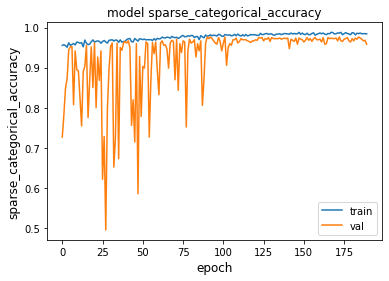

In [104]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [105]:
def make_LSTM_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    lstm1 = keras.layers.LSTM(100, activation='tanh', return_sequnces=False)(input_layer)
    
    output_layer = keras.layers.Dense(num_classes, activation="softmax")(lstm1)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [106]:
lstm_model = make_model(input_shape=x_train.shape[1:])

In [109]:
lstm_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

In [110]:
history = lstm_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 2s 11ms/step - loss: 0.6025 - sparse_categorical_accuracy: 0.6580 - val_loss: 0.7866 - val_sparse_categorical_accuracy: 0.4924 - lr: 0.0010
Epoch 2/500
90/90 [==============================] - 1s 7ms/step - loss: 0.4785 - sparse_categorical_accuracy: 0.7580 - val_loss: 0.7905 - val_sparse_categorical_accuracy: 0.4924 - lr: 0.0010
Epoch 3/500
90/90 [==============================] - 1s 7ms/step - loss: 0.4448 - sparse_categorical_accuracy: 0.7712 - val_loss: 0.6840 - val_sparse_categorical_accuracy: 0.4965 - lr: 0.0010
Epoch 4/500
90/90 [==============================] - 1s 7ms/step - loss: 0.4234 - sparse_categorical_accuracy: 0.7799 - val_loss: 0.6557 - val_sparse_categorical_accuracy: 0.6186 - lr: 0.0010
Epoch 5/500
90/90 [==============================] - 1s 7ms/step - loss: 0.4238 - sparse_categorical_accuracy: 0.7965 - val_loss: 0.7460 - val_sparse_categorical_accuracy: 0.5492 - lr: 0.0010
Epoch 6/500
90/90 [====================

In [112]:
test_loss, test_acc = lstm_model.evaluate(x_test, y_test)

# LSTM 셀 100개밖에 쓰지 않았지만 Conv 모델보다 더 좋은 결과가 나온다.
print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 0s 10ms/step - loss: 0.0982 - sparse_categorical_accuracy: 0.9674
Test accuracy 0.967424213886261
Test loss 0.09816991537809372


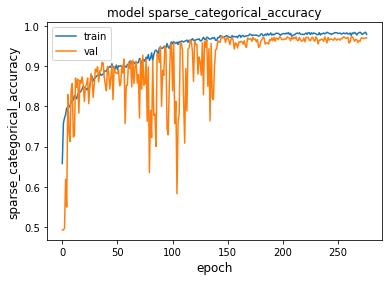

In [113]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [4]:
## 10장 문제

from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

In [5]:
print(df.shape)

(420551, 15)


In [25]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


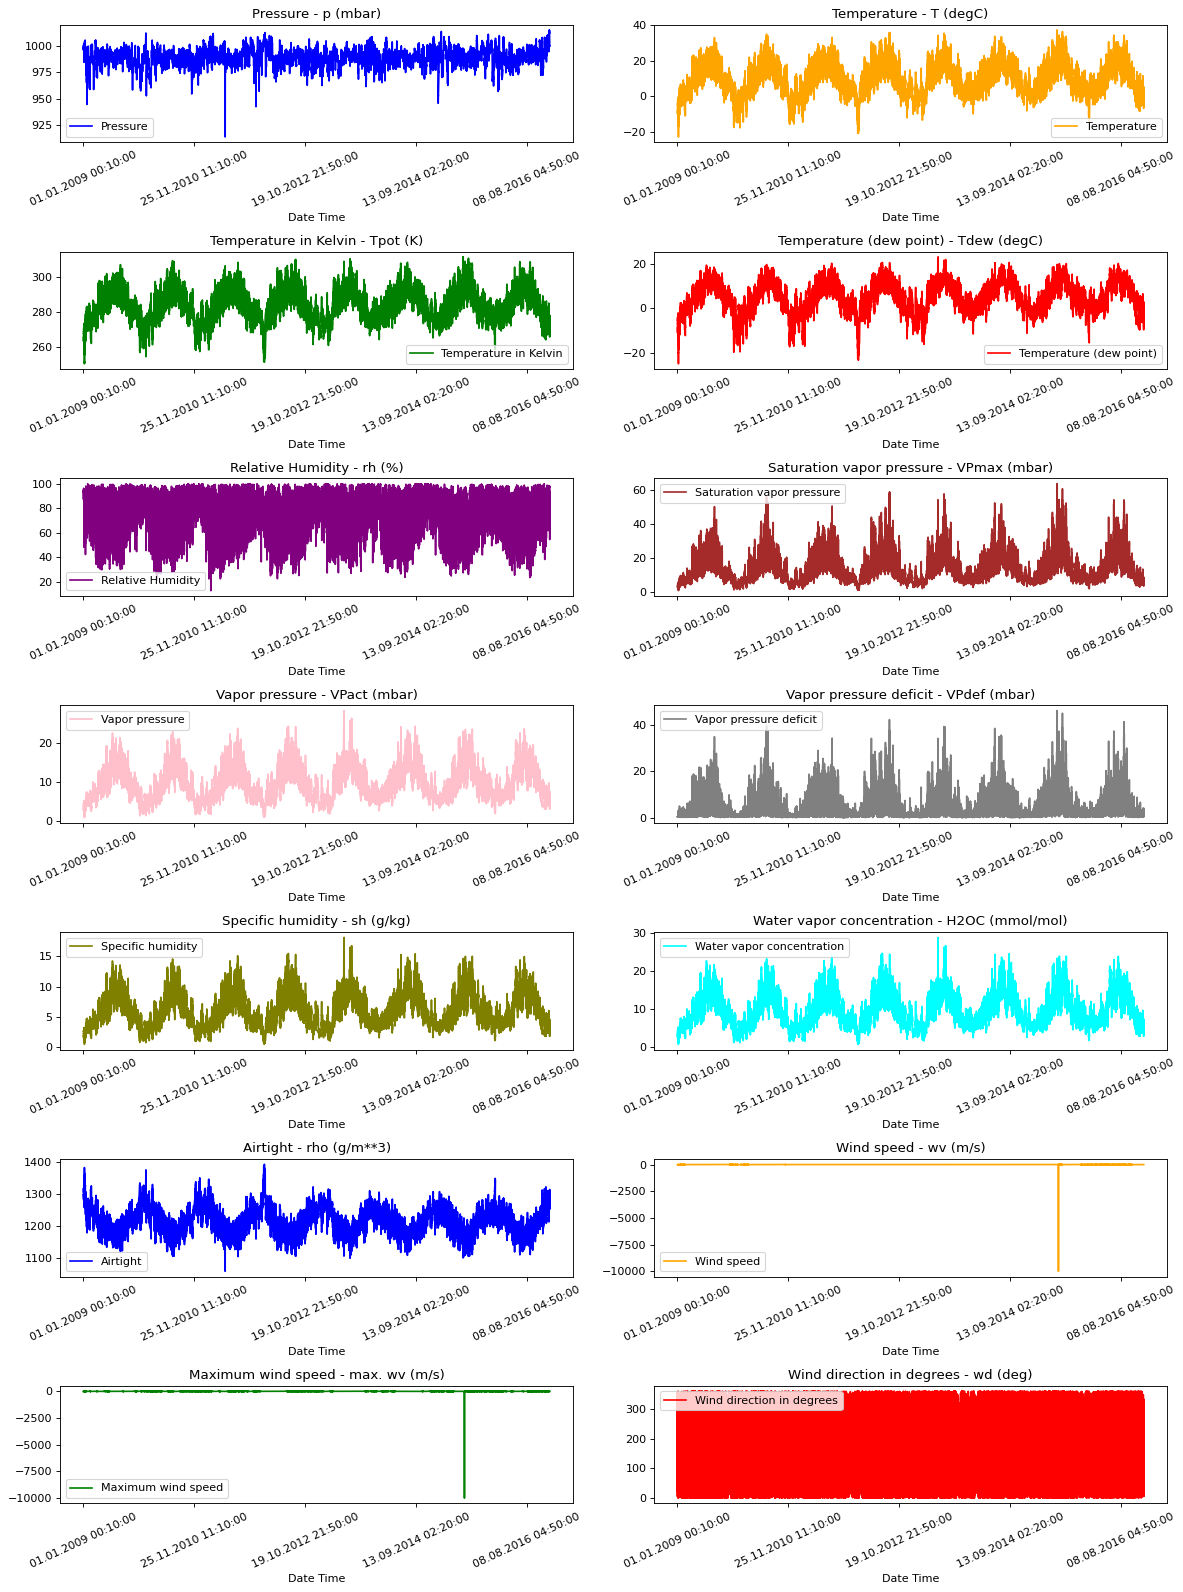

In [7]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    # 행이 7개, 열이 2개인 subplot을 만든다
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            # axes는 figure 내에서 축을 가지는 하나의 좌표평면 같은 개념
            # 실제로 데이터가 그려지는 곳은 axes이다.
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            # rotation의 약자로 x축의 이름을 돌린다
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

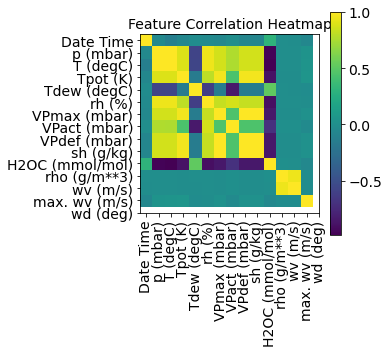

In [8]:
def show_heatmap(data):
    plt.matshow(data.corr())
    # X축을 설정해준다
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    # xaxis 의 tick를 아래로 설정한다.
    plt.gca().xaxis.tick_bottom()
    # Y축을 설정해준다
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    # 오른쪽 bar를 나타낸다.
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

In [9]:
# 42만개의 데이터를 가지고 있는 이 큰 데이터들을 처리해보자
# 측정은 10분에 한번씩 기록되어지고 있다.
# 그것은 한 시간마다 6번의 기록이 되어지고 있는 것을 의미한다.
# 우리는 60분 동안은 극적인 온도 변화가 없기 때문에 이것을 시간단위로 resampling 할 것이다.
# 우리는 과거의 720개의 timestamps를 이용하여 학습하고 ( 120 시간 )
# 72개의 timestamps를 예측해보려고 한다. ( 12시간 )

# 실수형 자료의 값의 범위는 매우 넓기 때문에 표준화할 필요가 있다
# 우리는 표준편차와 평균을 이용하여 0~1 사이의 실수형으로 바꿔주겠다

split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
print('train 데이터 갯수 : ', train_split)
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10

# 정규화 과정
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

train 데이터 갯수 :  300693


In [10]:
# 방금 전에 뽑은 heatmap을 가지고 관계계수가 높은 열들만 뽑아낸다.
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
# 원하는 열들만 선택하는 부분
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
Date Time,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,3.33,0.22,1.94,1307.75,1.03
01.01.2009 00:20:00,996.57,-8.41,3.23,0.21,1.89,1309.80,0.72
01.01.2009 00:30:00,996.53,-8.51,3.21,0.20,1.88,1310.24,0.19
01.01.2009 00:40:00,996.51,-8.31,3.26,0.19,1.92,1309.19,0.34
01.01.2009 00:50:00,996.51,-8.27,3.27,0.19,1.92,1309.00,0.32


In [11]:
# 정규화를 한 후 보게되는 값들
features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

,0,1,2,3,4,5,6
0,0.955451,-2.000020,-1.319782,-0.788479,-1.500927,2.237658,-0.732997
1,0.961528,-2.045185,-1.332806,-0.790561,-1.519521,2.287838,-0.936002
2,0.956666,-2.056766,-1.335410,-0.792642,-1.523239,2.298608,-1.283076
3,0.954236,-2.033604,-1.328898,-0.794724,-1.508364,2.272906,-1.184847
4,0.954236,-2.028972,-1.327596,-0.794724,-1.508364,2.268256,-1.197944


In [12]:
# 트레인 데이터와 검증 데이터를 분리해준다
# 여기서 loc은 레이블 기반으로 인덱싱을 하는 메소드인데 정수를 가지고 인덱싱을 하고 있다
# 따라서 iloc을 써도 상관없는 부분이다.
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

print(train_data.shape)
print(val_data.shape)

(300693, 7)
(119858, 7)


In [103]:
# 트레이닝 데이터 라벨은 721 번째 부터 시작하므로
# start 는 past로 대입한다.
start = past
end = start + train_split

x_train = train_data[[i for i in range(7)]]
y_train = features.iloc[start:end][[1]]

print(x_train.shape, y_train.shape)

sequence_length = int(past / step)

print(sequence_length)

(300693, 7) (300693, 1)
120


In [86]:
x_train

,0,1,2,3,4,5,6
0,0.955451,-2.000020,-1.319782,-0.788479,-1.500927,2.237658,-0.732997
1,0.961528,-2.045185,-1.332806,-0.790561,-1.519521,2.287838,-0.936002
2,0.956666,-2.056766,-1.335410,-0.792642,-1.523239,2.298608,-1.283076
3,0.954236,-2.033604,-1.328898,-0.794724,-1.508364,2.272906,-1.184847
4,0.954236,-2.028972,-1.327596,-0.794724,-1.508364,2.268256,-1.197944
...,...,...,...,...,...,...,...
300688,-0.104339,0.853478,0.713250,-0.116113,1.429472,-0.878353,-0.890162
300689,-0.101908,0.881272,0.752322,-0.024521,1.392285,-0.900138,-0.477604
300690,-0.111631,0.902117,0.780974,0.021274,1.392285,-0.920454,-0.791934
300691,-0.117708,0.896327,0.771857,0.012948,1.388566,-0.916538,-0.791934


In [87]:
y_train

,1
720,-2.551264
721,-2.568635
722,-2.583690
723,-2.592955
724,-2.604535
...,...
301408,0.001134
301409,0.006925
301410,0.018506
301411,0.024296


In [104]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [105]:
x_end = len(val_data) - past

label_start = train_split + past

# 정답데이터 분리
x_val = val_data.iloc[:x_end][[i for i in range(7)]]
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


In [90]:
x_val

,0,1,2,3,4,5,6
300693,-0.109200,0.855794,0.717157,-0.072399,1.384847,-0.879577,-0.942551
300694,-0.110416,0.852320,0.711948,-0.078644,1.381128,-0.876639,-1.302721
300695,-0.107985,0.788626,0.627292,-0.205623,1.373691,-0.820830,-1.197944
300696,-0.109200,0.734196,0.556963,-0.305541,1.358816,-0.773343,-1.217590
300697,-0.109200,0.679767,0.487936,-0.386725,1.325347,-0.724388,-0.667512
...,...,...,...,...,...,...,...
419826,1.696818,-0.669391,-0.732404,-0.297215,-1.006329,1.071296,0.164154
419827,1.696818,-0.684446,-0.741520,-0.311786,-1.006329,1.085248,-0.241856
419828,1.700464,-0.678656,-0.738915,-0.311786,-1.002610,1.081087,0.111766
419829,1.706541,-0.670549,-0.733706,-0.307623,-0.998891,1.074723,0.131412


In [91]:
y_val

,1
301413,0.039351
301414,0.054406
301415,0.061354
301416,0.063671
301417,0.068303
...,...
420546,-1.540264
420547,-1.459199
420548,-1.437195
420549,-1.561109


In [92]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse",     metrics=["mse"],)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                5120      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [106]:
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)


history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback],
    verbose=1
)

Epoch 1/10
1172/1172 [==============================] - 21s 17ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 2/10
1172/1172 [==============================] - 23s 20ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 3/10
1172/1172 [==============================] - 22s 18ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 4/10
1172/1172 [==============================] - 20s 17ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 5/10
1172/1172 [==============================] - 18s 15ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 6/10
1172/1172 [==============================] - 17s 14ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 7/10
1172/1172 [==============================] - 18s 15ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0084 - val_mse: 0.0084


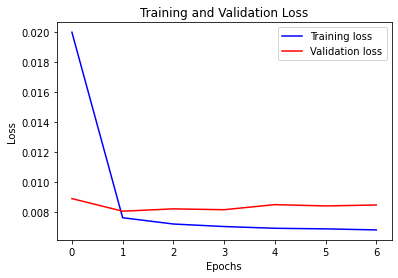

In [107]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

[-0.00254789]


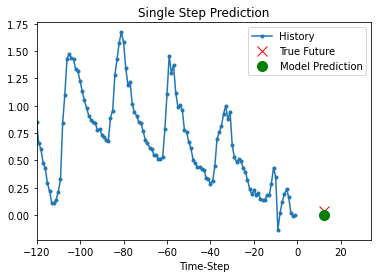

[0.6127163]


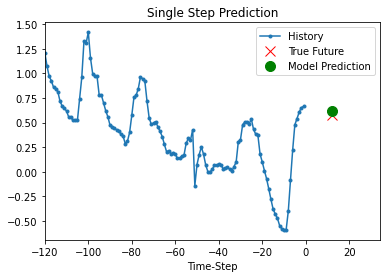

[0.579035]


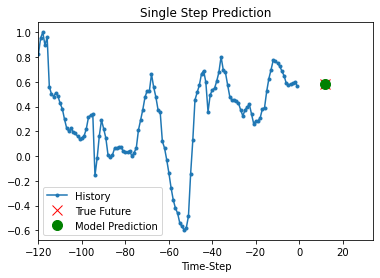

[0.53793186]


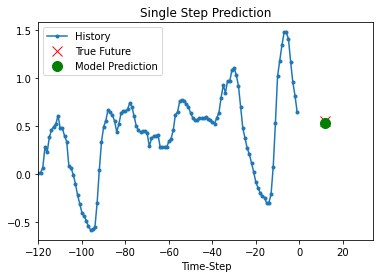

[1.2622968]


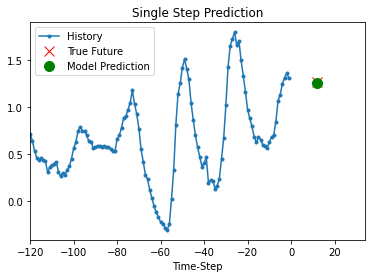

In [108]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    # 넘어온 x 축 데이터 120개의 갯수 마이너스화 시키고 range함
    # np.arange를 썼어도 된거 아닌가 싶음
    time_steps = list(range(-(plot_data[0].shape[0]), 0))

    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            # 정답이랑 예측값
            if(i==2):
                print(plot_data[i])
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            # 예측하기 전 데이터 들
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    # x값의 범위
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    # x.shape = (256, 120, 7)
    # x[0] = (120, 7)
    # x[0][:,1] = (120, ) temparture 데이터를 뽑아옴
    # x축은 시간 데이터
    # y축은 온도
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )



In [31]:
model.predict(x)

array([[0.39542973],
       [0.38935542],
       [0.3917783 ],
       [0.39608604],
       [0.38237047],
       [0.40585542],
       [0.4088124 ],
       [0.4131881 ],
       [0.4292208 ],
       [0.44149578],
       [0.45045775],
       [0.4743964 ],
       [0.48356974],
       [0.49292147],
       [0.5245902 ],
       [0.5463578 ],
       [0.5699871 ],
       [0.5950403 ],
       [0.6126742 ],
       [0.6251493 ],
       [0.6651274 ],
       [0.69072926],
       [0.7320776 ],
       [0.76421034],
       [0.7715834 ],
       [0.7657194 ],
       [0.8091099 ],
       [0.8383843 ],
       [0.8692357 ],
       [0.88892925],
       [0.89376163],
       [0.8959891 ],
       [0.93810207],
       [0.9662262 ],
       [0.9780741 ],
       [0.98387575],
       [1.0002447 ],
       [1.0084016 ],
       [1.0302848 ],
       [1.0532073 ],
       [1.0753182 ],
       [1.0896827 ],
       [1.0910066 ],
       [1.0972041 ],
       [1.1217428 ],
       [1.1224442 ],
       [1.1555579 ],
       [1.172